In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

В некоторых датасетах могут быть по-разному написаны названия и имена, я исправляю, где критично. Но мог что-то не заметить.

In [2]:
df = pd.read_csv("C:\\Users\\vesel\\Downloads\\forbes2 - forbes.csv", index_col=0)
df['Citizenship'].replace('USA','United States',inplace=True)
df

,Rank,Name,Net Worth(bil US$),Source,Citizenship,Year
0,1.0,"Gates, William III",18.5,NaN,United States,1996
288,289.0,"Branson, Richard",1.4,NaN,United Kingdom,1996
287,288.0,"Sahenk, Ayhan",1.4,NaN,Turkey,1996
286,287.0,"Ratanarak, Krit",1.4,NaN,Thailand,1996
285,286.0,"Jacobs, Klaus",1.4,NaN,Switzerland,1996
...,...,...,...,...,...,...
20830,729.0,Walter Faria,3.2,beer,Brazil,2018
20831,729.0,Sameer Gehlaut,3.2,finance,India,2018
20832,729.0,Tom Golisano,3.2,payroll services,United States,2018
20826,729.0,Scott Cook,3.2,software,United States,2018


Обобщаю Source состояние на другие года. Остаётся мало неизвестных.

In [3]:

names = df[df.Source.notnull()].Name
sources = df[df.Source.notnull()].Source
        
dict_name_source = dict(df[df.Source.notnull()].loc[:, ["Name", "Source"]].values)
dict_name_source
for i in range(df.shape[0]):
    if df.iloc[i, 1] in dict_name_source:
        df.iloc[i, 3] = dict_name_source[df.iloc[i, 1]]

In [4]:
df.Source.isnull().sum()

4670

In [5]:
top20 = """United States
Russia
Saudi Arabia
Canada
Iraq
China
United Arab Emirates
Brazil
Iran
Kuwait
Norway
Kazakhstan
Mexico
Nigeria
Qatar
Libya
Algeria
Angola
Oman
United Kingdom"""
top20 = top20.split("\n")
top20.append("Russian Federation")
top20.append("Iran, Islamic Rep.")
top20set = set(top20)
top20set

{'Algeria',
 'Angola',
 'Brazil',
 'Canada',
 'China',
 'Iran',
 'Iran, Islamic Rep.',
 'Iraq',
 'Kazakhstan',
 'Kuwait',
 'Libya',
 'Mexico',
 'Nigeria',
 'Norway',
 'Oman',
 'Qatar',
 'Russia',
 'Russian Federation',
 'Saudi Arabia',
 'United Arab Emirates',
 'United Kingdom',
 'United States'}

In [6]:
top20df = df.query("Citizenship in @top20")
top20df

,Rank,Name,Net Worth(bil US$),Source,Citizenship,Year
0,1.0,"Gates, William III",18.5,NaN,United States,1996
288,289.0,"Branson, Richard",1.4,NaN,United Kingdom,1996
283,284.0,"Aramburuzabala, Family",1.4,NaN,Mexico,1996
282,283.0,"Larrea, Jorge",1.4,NaN,Mexico,1996
281,282.0,"Romo Garza, Alfonso",1.4,NaN,Mexico,1996
...,...,...,...,...,...,...
20827,729.0,Leon G. Cooperman,3.2,hedge funds,United States,2018
20828,729.0,John Paul DeJoria,3.2,"hair products, tequila",United States,2018
20830,729.0,Walter Faria,3.2,beer,Brazil,2018
20832,729.0,Tom Golisano,3.2,payroll services,United States,2018


Iran, Lybia has no billionaires

In [8]:
grouped_top20 = top20df.groupby(["Citizenship", "Year"]).count()
num_cyear = grouped_top20.unstack(level=-1)["Rank"]
num_cyear.fillna(0, inplace=True)
num_cyear = num_cyear.sort_values(by="Citizenship")
num_cyear

Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Citizenship,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Brazil,10.0,3.0,3.0,8.0,9.0,6.0,6.0,4.0,6.0,8.0,...,13.0,18.0,30.0,36.0,46.0,65.0,54.0,31.0,43.0,42.0
Canada,5.0,3.0,4.0,9.0,15.0,16.0,14.0,15.0,17.0,17.0,...,20.0,24.0,24.0,25.0,29.0,32.0,39.0,33.0,39.0,46.0
China,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,...,28.0,64.0,115.0,95.0,122.0,152.0,213.0,251.0,319.0,373.0
Iraq,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kazakhstan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0
Kuwait,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,4.0,1.0,3.0,5.0,5.0,5.0,5.0,0.0,4.0,4.0
Mexico,15.0,6.0,7.0,11.0,13.0,13.0,12.0,11.0,11.0,10.0,...,9.0,9.0,11.0,11.0,15.0,16.0,16.0,14.0,15.0,16.0


Number of billionaires

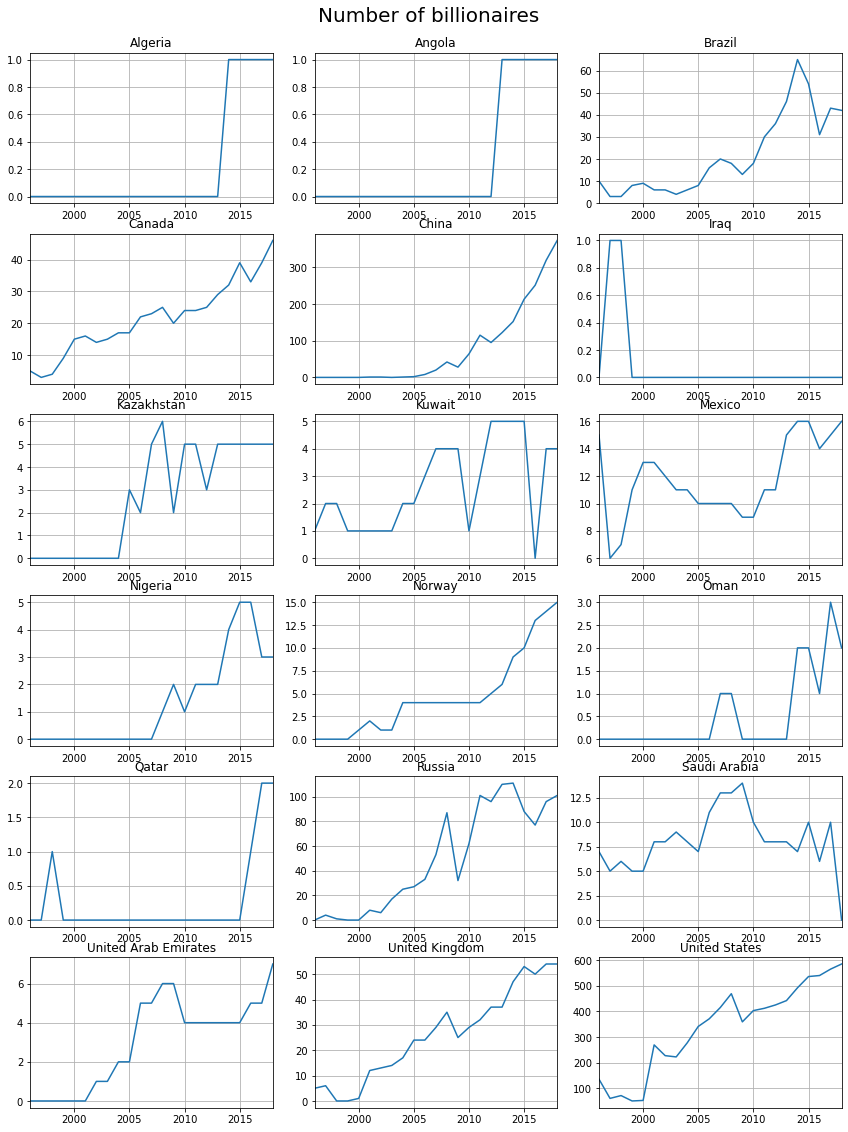

In [100]:
grouped_top20 = top20df.groupby(["Citizenship", "Year"]).count()
cnt = 0
fig, ax = plt.subplots(6, 3, figsize=(12, 16))
fig.tight_layout()

for i in sorted(list(set(grouped_top20.index.get_level_values(0)))):
    time = grouped_top20[grouped_top20.index.get_level_values(0) == i].index.get_level_values(1).astype("int")
    Y = grouped_top20[grouped_top20.index.get_level_values(0) == i].Rank.values
    yy = np.zeros(23)
    for j in range(len(time)):
        yy[time[j]-1996] = Y[j]
        
    time = [i for i in range(1996,2019)]
    Y = yy
    axx = sns.lineplot(x=time, y=Y,ax=ax[cnt//3, cnt%3])
    axx.set_title(i, fontsize=12)
    axx.set_xlabel ("")
    axx.set_xlim(1996, 2018)
    axx.grid()
    cnt += 1

fig.suptitle('Number of billionaires', fontsize=20)
fig.subplots_adjust(top=0.94)

In [10]:
popul = pd.read_csv("C:\\Users\\vesel\\Downloads\\population.csv")
popul.rename(columns={"Country Name" : "Country"}, inplace=True)
popul.Country.replace("Russian Federation", "Russia", inplace=True)
top20.append("Russian Federation")
top20.append("Iran, Islamic Rep.")
set_top20_new = set(num_cyear.index)
print(set_top20_new)
top20popul = popul.query("Country in @set_top20_new")
top20popul

{'Mexico', 'United Arab Emirates', 'United States', 'Kuwait', 'Saudi Arabia', 'United Kingdom', 'Canada', 'Qatar', 'Oman', 'Algeria', 'Brazil', 'Norway', 'Russia', 'Nigeria', 'Iraq', 'Kazakhstan', 'Angola', 'China'}


,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,2.614700e+07,2.712834e+07,2.812772e+07,2.915475e+07,3.020863e+07,3.127353e+07,3.235359e+07,3.342849e+07,3.450377e+07,NaN
8,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,133426.0,140984.0,148877.0,157006.0,165305.0,173797.0,...,8.751847e+06,8.835951e+06,8.916899e+06,8.994263e+06,9.068296e+06,9.140169e+06,9.211657e+06,9.287289e+06,9.365145e+06,NaN
29,Brazil,BRA,"Population, total",SP.POP.TOTL,73092515.0,75330008.0,77599218.0,79915555.0,82262794.0,84623747.0,...,2.017218e+08,2.034596e+08,2.051882e+08,2.068596e+08,2.085050e+08,2.101666e+08,2.117829e+08,2.131963e+08,2.143262e+08,NaN
35,Canada,CAN,"Population, total",SP.POP.TOTL,17909356.0,18271000.0,18614000.0,18964000.0,19325000.0,19678000.0,...,3.508295e+07,3.543744e+07,3.570291e+07,3.610949e+07,3.654524e+07,3.706508e+07,3.760123e+07,3.803720e+07,3.824611e+07,NaN
40,China,CHN,"Population, total",SP.POP.TOTL,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,...,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09,1.411100e+09,1.412360e+09,NaN
60,Algeria,DZA,"Population, total",SP.POP.TOTL,11394307.0,11598608.0,11778260.0,11969451.0,12179099.0,12381256.0,...,3.800063e+07,3.876017e+07,3.954315e+07,4.033933e+07,4.113655e+07,4.192701e+07,4.270537e+07,4.345167e+07,4.417797e+07,NaN
81,United Kingdom,GBR,"Population, total",SP.POP.TOTL,52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,...,6.412827e+07,6.460230e+07,6.511622e+07,6.561159e+07,6.605886e+07,6.646034e+07,6.683633e+07,6.708100e+07,6.732657e+07,NaN
113,Iraq,IRQ,"Population, total",SP.POP.TOTL,7084678.0,7260714.0,7481832.0,7735824.0,7997655.0,8270544.0,...,3.548180e+07,3.674649e+07,3.775781e+07,3.869794e+07,3.962116e+07,4.059070e+07,4.156352e+07,4.255698e+07,4.353359e+07,NaN
120,Kazakhstan,KAZ,"Population, total",SP.POP.TOTL,9319283.0,9639302.0,9959414.0,10277790.0,10590934.0,10897644.0,...,1.703555e+07,1.728828e+07,1.754281e+07,1.779406e+07,1.803778e+07,1.827645e+07,1.851367e+07,1.875567e+07,1.900099e+07,NaN
127,Kuwait,KWT,"Population, total",SP.POP.TOTL,305415.0,339697.0,378190.0,420494.0,465748.0,513840.0,...,3.646518e+06,3.761584e+06,3.908743e+06,4.048085e+06,4.124904e+06,4.317185e+06,4.441100e+06,4.360444e+06,4.250114e+06,NaN


In [11]:
top20popul = top20popul[["Country", '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018']]
top20popul = top20popul.sort_values(by="Country")
top20popul.index = sorted(top20popul.Country)
top20popul.drop(columns=["Country"], inplace=True)

top20popul

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Algeria,2.898463e+07,2.947603e+07,2.992467e+07,3.034608e+07,3.077462e+07,3.120098e+07,3.162470e+07,3.205588e+07,3.251019e+07,3.295669e+07,...,3.519604e+07,3.585634e+07,3.654354e+07,3.726056e+07,3.800063e+07,3.876017e+07,3.954315e+07,4.033933e+07,4.113655e+07,4.192701e+07
Angola,1.438335e+07,1.487115e+07,1.536686e+07,1.587075e+07,1.639406e+07,1.694159e+07,1.751614e+07,1.812434e+07,1.877112e+07,1.945096e+07,...,2.250767e+07,2.336418e+07,2.425911e+07,2.518829e+07,2.614700e+07,2.712834e+07,2.812772e+07,2.915475e+07,3.020863e+07,3.127353e+07
Brazil,1.660371e+08,1.685467e+08,1.710398e+08,1.734863e+08,1.758737e+08,1.782119e+08,1.804767e+08,1.826293e+08,1.847220e+08,1.867973e+08,...,1.945175e+08,1.963535e+08,1.981853e+08,1.999777e+08,2.017218e+08,2.034596e+08,2.051882e+08,2.068596e+08,2.085050e+08,2.101666e+08
Canada,2.961022e+07,2.990595e+07,3.015517e+07,3.040129e+07,3.068573e+07,3.102090e+07,3.136008e+07,3.164403e+07,3.194066e+07,3.224375e+07,...,3.362890e+07,3.400489e+07,3.433933e+07,3.471422e+07,3.508295e+07,3.543744e+07,3.570291e+07,3.610949e+07,3.654524e+07,3.706508e+07
China,1.217550e+09,1.230075e+09,1.241935e+09,1.252735e+09,1.262645e+09,1.271850e+09,1.280400e+09,1.288400e+09,1.296075e+09,1.303720e+09,...,1.331260e+09,1.337705e+09,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09
Iraq,2.163933e+07,2.233077e+07,2.305349e+07,2.382073e+07,2.462886e+07,2.542566e+07,2.625534e+07,2.706882e+07,2.785895e+07,2.869868e+07,...,3.028904e+07,3.126488e+07,3.237806e+07,3.386445e+07,3.548180e+07,3.674649e+07,3.775781e+07,3.869794e+07,3.962116e+07,4.059070e+07
Kazakhstan,1.557823e+07,1.533440e+07,1.507164e+07,1.492837e+07,1.488363e+07,1.485834e+07,1.485895e+07,1.490902e+07,1.501298e+07,1.514703e+07,...,1.609282e+07,1.632187e+07,1.655720e+07,1.679209e+07,1.703555e+07,1.728828e+07,1.754281e+07,1.779406e+07,1.803778e+07,1.827645e+07
Kuwait,1.703318e+06,1.761468e+06,1.819544e+06,1.877427e+06,1.934901e+06,1.991674e+06,2.047364e+06,2.101506e+06,2.153481e+06,2.235403e+06,...,2.795550e+06,2.943356e+06,3.143825e+06,3.394663e+06,3.646518e+06,3.761584e+06,3.908743e+06,4.048085e+06,4.124904e+06,4.317185e+06
Mexico,9.158656e+07,9.318309e+07,9.476728e+07,9.633481e+07,9.787344e+07,9.939429e+07,1.009171e+08,1.024293e+08,1.039458e+08,1.054424e+08,...,1.110494e+08,1.125324e+08,1.141505e+08,1.157559e+08,1.172907e+08,1.187559e+08,1.201499e+08,1.215192e+08,1.228393e+08,1.240139e+08
Nigeria,1.109562e+08,1.137912e+08,1.166905e+08,1.196956e+08,1.228520e+08,1.261527e+08,1.295830e+08,1.331198e+08,1.367568e+08,1.404907e+08,...,1.565958e+08,1.609529e+08,1.654637e+08,1.700759e+08,1.747261e+08,1.793790e+08,1.839958e+08,1.886669e+08,1.934959e+08,1.983876e+08


## Number of billionaires per million population:

In [12]:
bill_popul = pd.DataFrame(10**6 * num_cyear.values / top20popul.values, index=sorted(top20popul.index),
                          columns=[i for i in range(1996,2019)])
bill_popul

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.025800,0.025289,0.024790,0.024309,0.023851
Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.038245,0.036862,0.035552,0.034300,0.033103,0.031976
Brazil,0.060227,0.017799,0.017540,0.046113,0.051173,0.033668,0.033245,0.021902,0.032481,0.042827,...,0.066832,0.091671,0.151373,0.180020,0.228037,0.319474,0.263173,0.149860,0.206230,0.199841
Canada,0.168861,0.100314,0.132647,0.296040,0.488827,0.515781,0.446427,0.474023,0.532237,0.527234,...,0.594727,0.705781,0.698907,0.720166,0.826612,0.903000,1.092348,0.913887,1.067171,1.241060
China,0.000000,0.000000,0.000000,0.000000,0.000000,0.000786,0.000781,0.000000,0.000772,0.001534,...,0.021033,0.047843,0.085500,0.070153,0.089493,0.110798,0.154363,0.180863,0.228475,0.265904
Iraq,0.000000,0.044781,0.043377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kazakhstan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198059,...,0.124279,0.306337,0.301983,0.178656,0.293504,0.289213,0.285017,0.280993,0.277196,0.273576
Kuwait,0.587089,1.135417,1.099176,0.532644,0.516822,0.502090,0.488433,0.475849,0.928729,0.894693,...,1.430845,0.339748,0.954252,1.472900,1.371171,1.329227,1.279184,0.000000,0.969720,0.926530
Mexico,0.163779,0.064389,0.073865,0.114185,0.132825,0.130792,0.118910,0.107391,0.105824,0.094839,...,0.081045,0.079977,0.096364,0.095028,0.127887,0.134730,0.133167,0.115208,0.122111,0.129018
Nigeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012772,0.006213,0.012087,0.011759,0.011446,0.022299,0.027175,0.026502,0.015504,0.015122


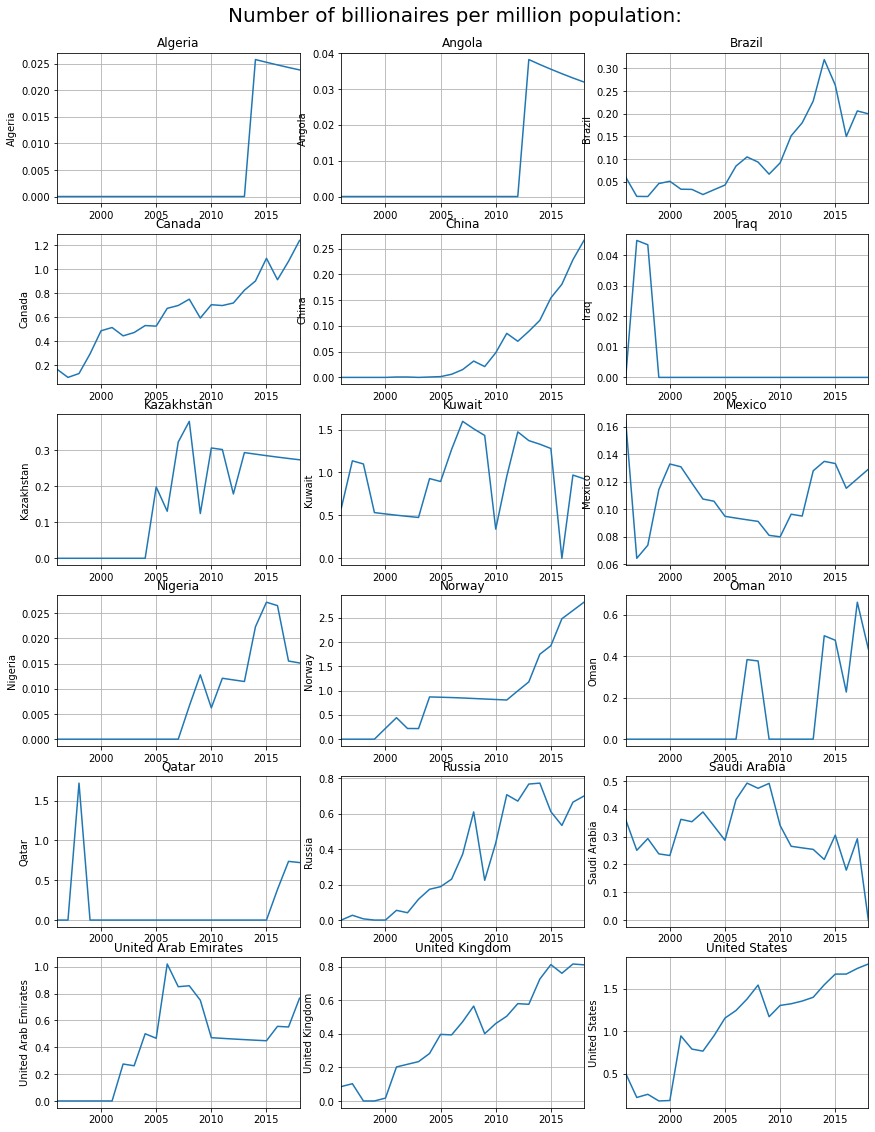

In [13]:
cnt = 0
fig, ax = plt.subplots(6, 3, figsize=(12, 16))
fig.tight_layout()

for i in bill_popul.index:
    time = bill_popul.columns
    Y = bill_popul.loc[i, :]
    axx = sns.lineplot(x=time, y=Y,ax=ax[cnt//3, cnt%3], )
    axx.set_title(i, fontsize=12)
    axx.set_xlabel("")
    axx.set_xlim(1996, 2018)
    axx.grid()
    cnt += 1
    
fig.suptitle('Number of billionaires per million population:', fontsize=20)
fig.subplots_adjust(top=0.94)

So far, I used GDP in current price from https://data.worldbank.org/indicator/NY.GDP.MKTP.CD 
It can be inapropriate. I think I need adjust billionaires wealth by inflation or find nominal GDP.

In [14]:
# pd.DataFrame([sorted(top20popul.Country), num_cyear.index])

gdp = pd.read_csv("C:\\Users\\vesel\\Downloads\\world_bank_gdp.csv")
gdp.rename(columns={"Country Name" : "Country"}, inplace=True)
gdp.Country.replace("Russian Federation", "Russia", inplace=True)
set_top20_new = set(num_cyear.index)
top20gdp = gdp.query("Country in @set_top20_new")
top20gdp = top20gdp[["Country", '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018']].sort_values(by="Country")
top20gdp.index = sorted(top20gdp.Country)
top20gdp.drop(columns=["Country"], inplace=True)
top20gdp

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Algeria,4.694158e+10,4.817761e+10,4.818775e+10,4.864065e+10,5.479039e+10,5.474471e+10,5.676036e+10,6.786383e+10,8.533258e+10,1.031982e+11,...,1.372110e+11,1.612073e+11,2.000131e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.659793e+11,1.600342e+11,1.700970e+11,1.749109e+11
Angola,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,...,7.030717e+10,8.169953e+10,1.094366e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10
Brazil,8.504264e+11,8.832065e+11,8.637110e+11,5.996421e+11,6.554482e+11,5.599913e+11,5.097888e+11,5.582292e+11,6.692938e+11,8.916302e+11,...,1.667020e+12,2.208872e+12,2.616202e+12,2.465189e+12,2.472807e+12,2.455994e+12,1.802214e+12,1.795700e+12,2.063508e+12,1.916947e+12
Canada,6.285464e+11,6.549870e+11,6.340000e+11,6.784122e+11,7.447734e+11,7.389818e+11,7.606493e+11,8.955406e+11,1.026690e+12,1.173109e+12,...,1.374625e+12,1.617343e+12,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12
China,8.637467e+11,9.616040e+11,1.029043e+12,1.093997e+12,1.211347e+12,1.339396e+12,1.470550e+12,1.660288e+12,1.955347e+12,2.285966e+12,...,5.101703e+12,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13
Iraq,1.043370e+10,2.076486e+10,2.061741e+10,3.688160e+10,4.836425e+10,3.617643e+10,3.292845e+10,2.192157e+10,3.662790e+10,4.995489e+10,...,1.116576e+11,1.385167e+11,1.857497e+11,2.180025e+11,2.346377e+11,2.284157e+11,1.667741e+11,1.666025e+11,1.872177e+11,2.273675e+11
Kazakhstan,2.103537e+10,2.216593e+10,2.213525e+10,1.687082e+10,1.829199e+10,2.215269e+10,2.463659e+10,3.083370e+10,4.315165e+10,5.712367e+10,...,1.153087e+11,1.480473e+11,1.926265e+11,2.079986e+11,2.366346e+11,2.214156e+11,1.843884e+11,1.372783e+11,1.668058e+11,1.793400e+11
Kuwait,3.149332e+10,3.035509e+10,2.593996e+10,3.012385e+10,3.771284e+10,3.488751e+10,3.813755e+10,4.787651e+10,5.943909e+10,8.079863e+10,...,1.059632e+11,1.154194e+11,1.540681e+11,1.740704e+11,1.741611e+11,1.626314e+11,1.145673e+11,1.094197e+11,1.207074e+11,1.381824e+11
Mexico,4.109756e+11,5.004135e+11,5.265021e+11,6.002329e+11,7.079067e+11,7.567063e+11,7.721064e+11,7.293363e+11,7.822406e+11,8.774762e+11,...,9.000454e+11,1.057801e+12,1.180490e+12,1.201090e+12,1.274443e+12,1.315351e+12,1.171868e+12,1.078491e+12,1.158913e+12,1.222408e+12
Nigeria,5.107582e+10,5.445784e+10,5.460405e+10,5.937261e+10,6.944876e+10,7.279728e+10,9.505409e+10,1.047390e+11,1.357647e+11,1.756705e+11,...,2.950088e+11,3.669905e+11,4.144665e+11,4.639710e+11,5.201172e+11,5.741838e+11,4.930268e+11,4.046490e+11,3.757457e+11,4.217392e+11


In [15]:
top20df.groupby(["Citizenship", "Year"]).sum()

Rank  Net Worth(bil US$)
Citizenship   Year                              
Algeria       2014     506.0                3.20
              2015     577.0                3.10
              2016     549.0                3.10
              2017     630.0                3.10
              2018     550.0                4.00
...                      ...                 ...
United States 2014  357063.0             2318.45
              2015  420086.0             2567.70
              2016  422345.0             2399.00
              2017  475609.0             2756.80
              2018  536563.0             3096.70

[279 rows x 2 columns]

In [16]:
wealth = top20df.groupby(["Citizenship", "Year"]).sum().unstack(level=-1)["Net Worth(bil US$)"]
wealth.fillna(0, inplace=True)
wealth = wealth.sort_values("Citizenship")
wealth

Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Citizenship,,,,,,,,,,,,,,,,,,,,,
Algeria,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,3.20,3.1,3.1,3.1,4.0
Angola,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,2.00,3.70,3.3,3.0,3.1,2.6
Brazil,18.4,11.00,14.0,12.9,20.3,14.1,13.7,8.5,12.5,18.6,...,40.3,90.3,131.4,151.00,189.30,191.55,181.2,135.1,172.1,176.4
Canada,15.8,17.50,23.5,28.5,46.2,46.7,42.6,44.9,59.2,66.8,...,52.3,74.7,85.2,79.90,92.05,112.55,134.8,112.4,133.8,148.5
China,0.0,0.00,0.0,0.0,0.0,1.3,1.0,0.0,1.1,3.1,...,43.8,133.2,230.4,204.35,262.96,374.80,567.6,593.0,808.6,1120.4
Iraq,0.0,5.00,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Kazakhstan,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.2,10.3,12.0,7.80,9.20,9.15,10.8,9.3,10.5,14.4
Kuwait,3.0,18.80,19.4,4.7,5.7,6.0,5.7,5.1,9.6,10.2,...,11.5,8.7,13.2,6.80,6.15,6.40,6.1,0.0,5.4,5.2
Mexico,25.6,15.30,23.9,26.5,24.9,34.1,31.6,24.0,35.5,42.5,...,55.1,90.3,125.1,129.70,148.50,142.90,144.5,99.6,116.7,141.0


In [17]:
bill_w_ofcountry = pd.DataFrame(10**9 * wealth.values / top20gdp.values, index=sorted(top20gdp.index),
                          columns=[i for i in range(1996,2019)])
bill_w_ofcountry

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.014967,0.018677,0.019371,0.018225,0.022869
Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014992,0.026959,0.037836,0.060192,0.044945,0.033422
Brazil,0.021636,0.012455,0.016209,0.021513,0.030971,0.025179,0.026874,0.015227,0.018676,0.020861,...,0.024175,0.040881,0.050225,0.061253,0.076553,0.077993,0.100543,0.075235,0.083402,0.092021
Canada,0.025137,0.026718,0.037066,0.042010,0.062032,0.063195,0.056005,0.050137,0.057661,0.056943,...,0.038047,0.046187,0.047509,0.043700,0.049848,0.062329,0.086604,0.073560,0.081127,0.086071
China,0.000000,0.000000,0.000000,0.000000,0.000000,0.000971,0.000680,0.000000,0.000563,0.001356,...,0.008585,0.021882,0.030510,0.023950,0.027476,0.035778,0.051313,0.052790,0.065684,0.080634
Iraq,0.000000,0.240791,0.242514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kazakhstan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052518,...,0.019079,0.069572,0.062297,0.037500,0.038879,0.041325,0.058572,0.067746,0.062947,0.080294
Kuwait,0.095258,0.619336,0.747881,0.156023,0.151142,0.171981,0.149459,0.106524,0.161510,0.126240,...,0.108528,0.075377,0.085676,0.039065,0.035312,0.039353,0.053244,0.000000,0.044736,0.037631
Mexico,0.062291,0.030575,0.045394,0.044150,0.035174,0.045064,0.040927,0.032907,0.045382,0.048434,...,0.061219,0.085366,0.105973,0.107985,0.116521,0.108640,0.123307,0.092351,0.100698,0.115346
Nigeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012542,0.005722,0.038121,0.033407,0.039991,0.057995,0.046448,0.073891,0.052163,0.049557


Доля благосостояния миллиардеров от ВВП страны (ВВП в текущих долларах, благосостояния - нет)

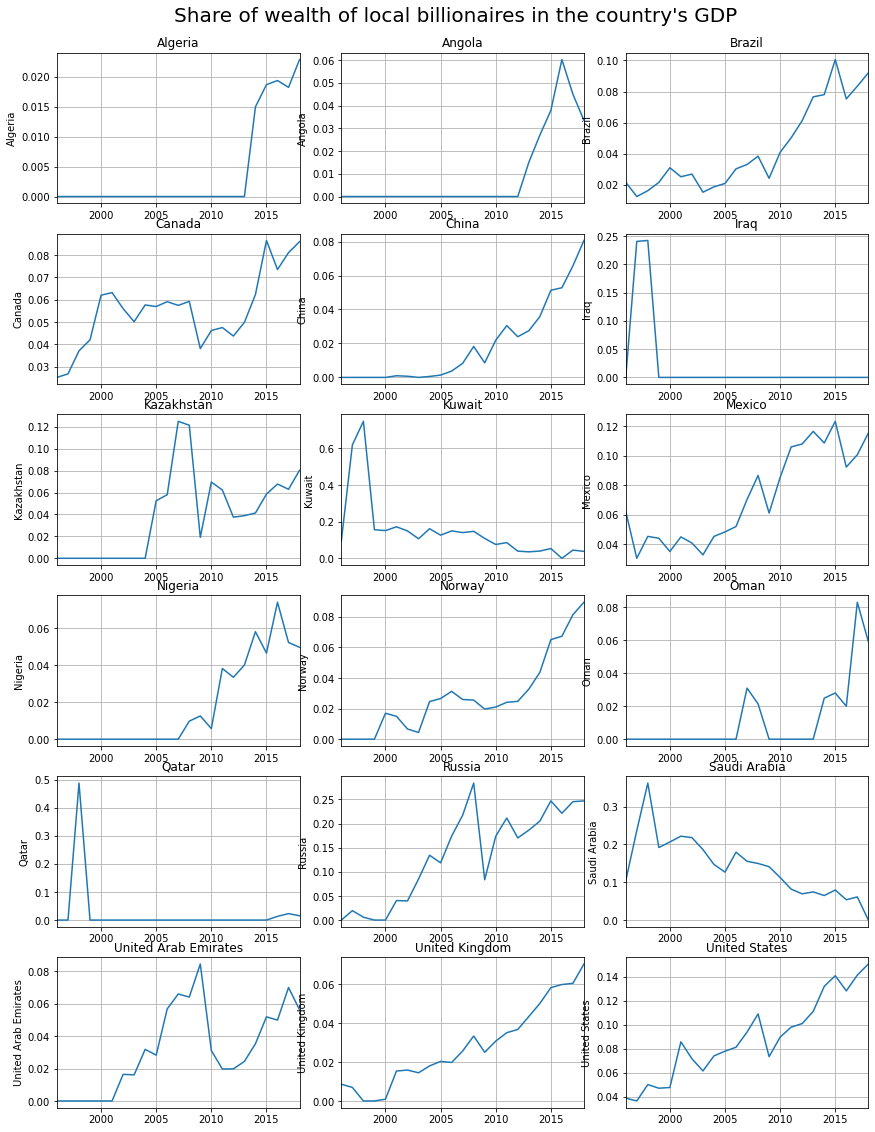

In [18]:
cnt = 0
fig, ax = plt.subplots(6, 3, figsize=(12, 16))
fig.tight_layout()

for i in bill_w_ofcountry.index:
    time = bill_w_ofcountry.columns
    Y = bill_w_ofcountry.loc[i, :]
    axx = sns.lineplot(x=time, y=Y,ax=ax[cnt//3, cnt%3], )
    axx.set_title(i, fontsize=12)
    axx.set_xlabel("")
    axx.set_xlim(1996, 2018)
    axx.grid()
    cnt += 1
    
fig.suptitle("Share of wealth of local billionaires in the country's GDP", fontsize=20)
fig.subplots_adjust(top=0.94)

In [19]:
set(top20df.Source)

{'5-Hour Energy',
 'AOL',
 'Agribusiness',
 'Airbnb',
 'Alibaba',
 'Amazon',
 'Amway',
 'Apollo Group',
 'Apple, Disney',
 'Apple, Pixar',
 'Appliances',
 'AriZona Beverages',
 'Arnold Clark Automobiles',
 'Asset management',
 'Banking',
 'Banking, real estate',
 'Berkshire Hathaway',
 'Best Buy',
 'Bloomberg LP',
 'Bose',
 'Campbell Soup',
 'Cargill',
 'Cargill Inc.',
 'Carnival Cruises',
 'Charlotte Hornets, endorsements',
 'Chick-fil-A',
 'Cirque du Soleil',
 'Cisco',
 'Citigroup',
 'Coal',
 'Columbia Sportswear',
 'Comcast',
 'Conde Nast',
 'Craigslist',
 'Dallas Cowboys',
 'Dell computers',
 "Dick's Sporting Goods",
 'DirecTV',
 'Dolby Laboratories',
 'Dole, real estate',
 'Dropbox',
 'Enterprise Rent-A-Car',
 'Estee Lauder',
 'Facebook',
 'Facebook, Palantir',
 'Fashion',
 'FedEx',
 'Fidelity',
 'FlightSafety',
 'Food & Beverage',
 'Ford Motor',
 'Ford Motor Co',
 'Forever 21',
 'Formula One',
 'Franklin Resources',
 'Gap',
 'Getty Oil',
 'GoPro',
 'Google',
 'Groupon',
 'HCA Hea

In [20]:
def plot_by_source(sources : list, year=2003: int) -> None:
    sources_full = set()
    for i in set(top20df.Source):
        for j in sources:
            if isinstance(i, str) and j in i:
                sources_full.add(i)
    
    year = 2003
    _oilgas_by_year = top20df.query("Source in @oilgas_sources").groupby("Year").sum().loc[year:, "Net Worth(bil US$)"].values
    _all_by_year = top20df.groupby("Year").sum().loc[year:, "Net Worth(bil US$)"].values
    tt = top20df.groupby("Year").sum().loc[2003:, "Net Worth(bil US$)"].index
    sns.lineplot(x=tt, y=_oilgas_by_year / _all_by_year)
    plt.title("Share of 'sources' related billionaires of all")
    plt.grid()
    
    
    

oil_sources = set()
oilgas_sources = set()

for i in set(top20df.Source):
    if isinstance(i, str) and ("oil" in i or "gas" in i):
        oilgas_sources.add(i)
        
for i in set(top20df.Source):
    if isinstance(i, str) and ("oil" in i):
        oil_sources.add(i)
oil_sources

{'mining, oil',
 'oil',
 'oil & gas',
 'oil & gas, banking',
 'oil & gas, investments',
 'oil and gas',
 'oil refining',
 'oil services',
 'oil, banking',
 'oil, banking, real estate',
 'oil, banking, telecom',
 'oil, diversified',
 'oil, fertilizers',
 'oil, gas',
 'oil, investments',
 'oil, real estate',
 'oil, resorts',
 'oil, telecom, banking',
 'oil, transportation',
 'oilfield equipment',
 'radio, oil, real estate',
 'real estate, oil, cars, sports',
 'telecom, oil',
 'telecom, oil service, real estate'}

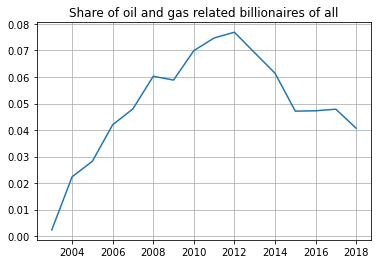

In [21]:

_oilgas_by_year = top20df.query("Source in @oilgas_sources").groupby("Year").sum()["Net Worth(bil US$)"].values
_all_by_year = top20df.groupby("Year").sum()["Net Worth(bil US$)"].values[7:]
top20df.query("Source in @oilgas_sources").groupby("Year").sum()["Net Worth(bil US$)"]

tt = [i for i in range(2003, 2019)]

sns.lineplot(x=tt, y=_oilgas_by_year / _all_by_year)
plt.title("Share of oil and gas related billionaires of all")
plt.grid()

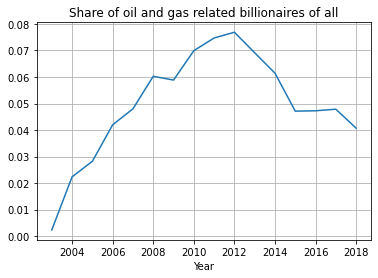

In [36]:

year = 2003
_oilgas_by_year = top20df.query("Source in @oilgas_sources").groupby("Year").sum().loc[year:, "Net Worth(bil US$)"].values
_all_by_year = top20df.groupby("Year").sum().loc[year:, "Net Worth(bil US$)"].values
# tt = [i for i in range(2003, 2019)]
tt = top20df.groupby("Year").sum().loc[2003:, "Net Worth(bil US$)"].index

sns.lineplot(x=tt, y=_oilgas_by_year / _all_by_year)
plt.title("Share of oil and gas related billionaires of all")
plt.grid()

Sources: {'mining, metals, machinery', 'construction, mining', 'oil & gas, banking', 'natural gas, fertilizers', 'metals, energy', 'radio, oil, real estate', 'gold, coal mining', 'mining, steel', 'energy, chemicals', 'oil, banking, telecom', 'energy investments', 'renewable energy', 'mining, metals', 'telecom, oil', 'coal mining', 'iron ore mining', 'natural gas', 'oil', 'oil, resorts', 'energy drinks', 'mining, commodities', 'real estate, oil, cars, sports', 'diamond jewelry', 'oil, banking, real estate', 'mining, oil', 'oil and gas', 'oil, investments', 'oil & gas', 'oilfield equipment', 'gas stations, retail', 'gas, petrochemicals', 'oil, transportation', 'energy services', 'oil refining', 'metals, mining', 'real estate, energy, insurance', 'oil & gas, investments', 'oil, gas', 'mining, copper products', 'energy', 'energy, sports', 'gas, chemicals', 'textiles, energy', 'gas', 'oil, telecom, banking', 'port, gas', 'retail & gas stations', 'mining, banking, hotels', 'oil services', 's

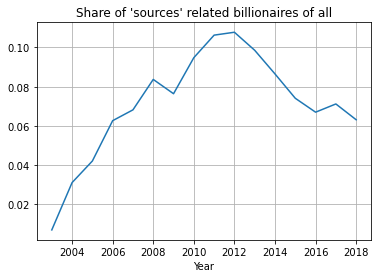

In [77]:
def plot_by_source(sources : list, year: int=2003) -> None:
#     year = 2003
    sources_full = set()
    for i in set(top20df.Source):
        for j in sources:
            if isinstance(i, str) and j in i:
                sources_full.add(i)
    
    print("Sources:", sources_full)
    year = 2003
    
    _oilgas_by_year = top20df.query("Source in @sources_full").groupby("Year").sum().loc[year:, "Net Worth(bil US$)"].values
    _all_by_year = top20df.groupby("Year").sum().loc[year:, "Net Worth(bil US$)"].values
    tt = top20df.groupby("Year").sum().loc[year:, "Net Worth(bil US$)"].index
    sns.lineplot(x=tt, y=_oilgas_by_year / _all_by_year)
    plt.title("Share of 'sources' related billionaires of all")
    plt.grid()

plot_by_source(["mining", "oil", "gas", "gold", "diam", "forest", "energy"])

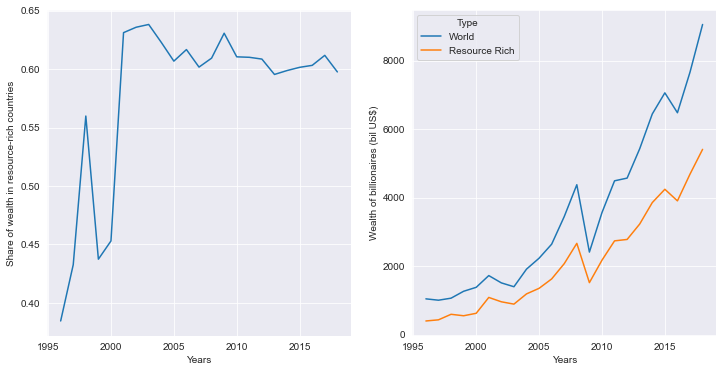

In [148]:
df_wealth = df.groupby(["Year", "Citizenship"]).sum().unstack(level=-1)
df_wealth.fillna(0, inplace=True)
df_wealth = df_wealth["Net Worth(bil US$)"].sum(axis=1)

top20df_wealth = top20df.groupby(["Year", "Citizenship"]).sum().unstack(level=-1)
top20df_wealth.fillna(0, inplace=True)
top20df_wealth = top20df_wealth["Net Worth(bil US$)"].sum(axis=1)

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

sns.set_style("darkgrid")
sns.lineplot(data= top20df_wealth/df_wealth, ax=ax[0])
ax[0].set_xlabel("Years")
ax[0].set_ylabel("Share of wealth in resource-rich countries")


sns.lineplot(data=df_wealth,ax=ax[1])
sns.lineplot(data=top20df_wealth, ax=ax[1], )
ax[1].set_xlabel("Years")
ax[1].set_ylabel("Wealth of billionaires (bil US$)")
plt.legend(title='Type', labels=['World', 'Resource Rich'])